## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Baca gambar dari file 'dino.jpg'

In [2]:
dino = cv2.imread('dino.jpg')

## Konversi ke grayscale

In [3]:
gray = cv2.cvtColor(dino, cv2.COLOR_BGR2GRAY)
copy_gray = gray.copy().astype(float)
m, n = copy_gray.shape

## Mean filtering

In [4]:
mean_filtered = np.zeros((m, n))
for i in range(1, m-1):
    for j in range(1, n-1):
        jumlah = (
            copy_gray[i-1,j-1] + copy_gray[i-1,j] + copy_gray[i-1,j+1] +
            copy_gray[i,  j-1] + copy_gray[i,  j] + copy_gray[i,  j+1] +
            copy_gray[i+1,j-1] + copy_gray[i+1,j] + copy_gray[i+1,j+1]
        )
        mean_filtered[i, j] = jumlah / 9

## Median filtering

In [5]:
dino_rgb = cv2.cvtColor(dino, cv2.COLOR_BGR2RGB)
median_filtered = cv2.medianBlur(dino_rgb, 5)

## Tampilkan Hasil

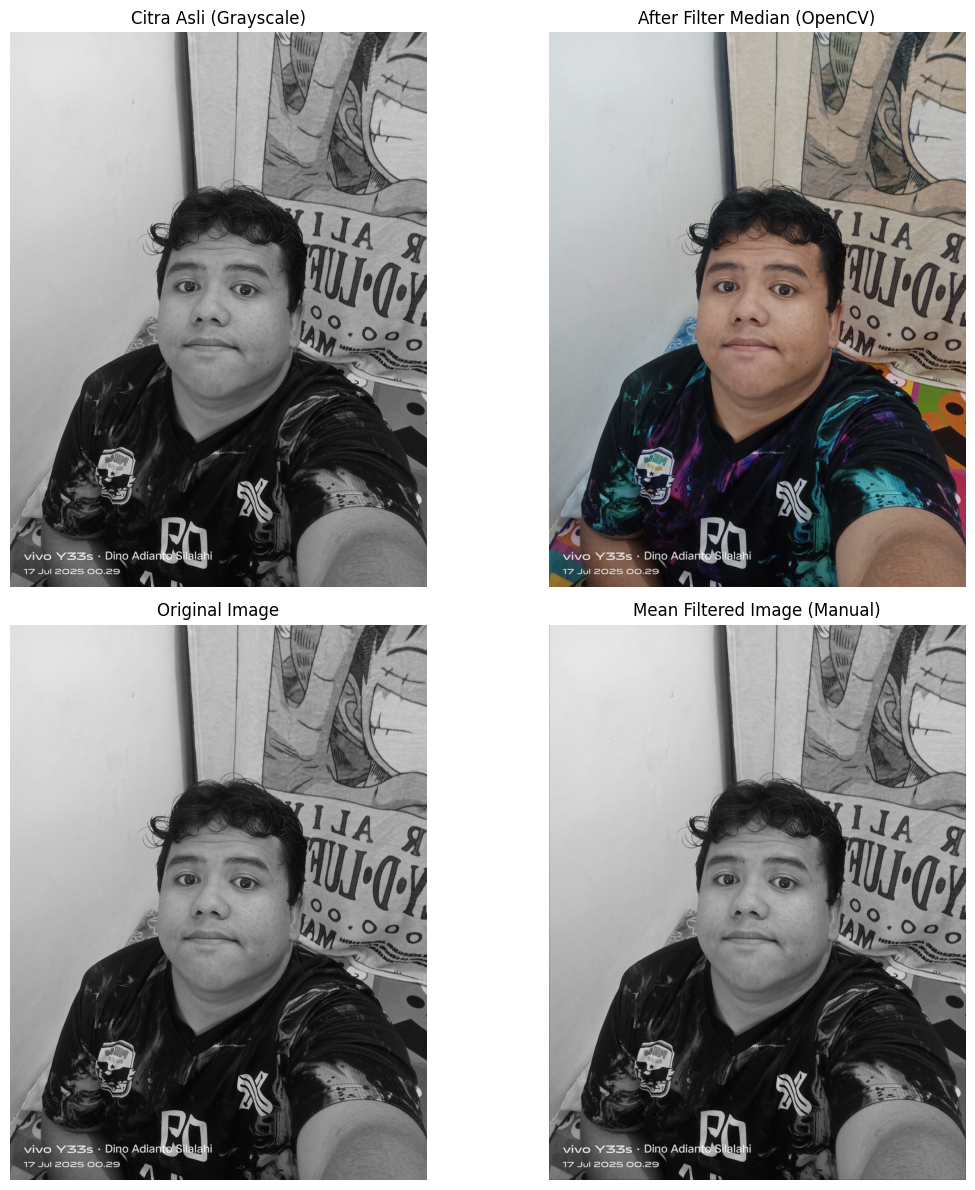

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Citra Asli (Grayscale)')
axs[0].axis('off')

axs[1].imshow(median_filtered)
axs[1].set_title('After Filter Median (OpenCV)')
axs[1].axis('off')

axs[2].imshow(gray, cmap='gray')
axs[2].set_title('Original Image')
axs[2].axis('off')

axs[3].imshow(mean_filtered, cmap='gray')
axs[3].set_title('Mean Filtered Image (Manual)')
axs[3].axis('off')

plt.tight_layout()
plt.show()

## import library os

In [7]:
import os
from io import BytesIO
from PIL import Image

## KOMPRESI LOSSY JPEG QUALITY

In [8]:
_, jpeg_encoded = cv2.imencode('.jpg', dino, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
jpeg_decoded = cv2.imdecode(np.frombuffer(jpeg_encoded, np.uint8), cv2.IMREAD_COLOR)
jpeg_rgb = cv2.cvtColor(jpeg_decoded, cv2.COLOR_BGR2RGB)
jpeg_size_kb = len(jpeg_encoded) / 1024

## KUANTISASI RGB KE 4 LEVEL

In [9]:
quantized_rgb = (dino_rgb // 64) * 85
buffer = BytesIO()
Image.fromarray(quantized_rgb).save(buffer, format='PNG')
quantized_size_kb = len(buffer.getvalue()) / 1024

## UKURAN CITRA ASLI

In [10]:
original_buffer = BytesIO()
Image.fromarray(dino_rgb).save(original_buffer, format='PNG')
original_size_kb = len(original_buffer.getvalue()) / 1024

## TAMPILKAN HASIL KOMPRESI & KUANTISASI

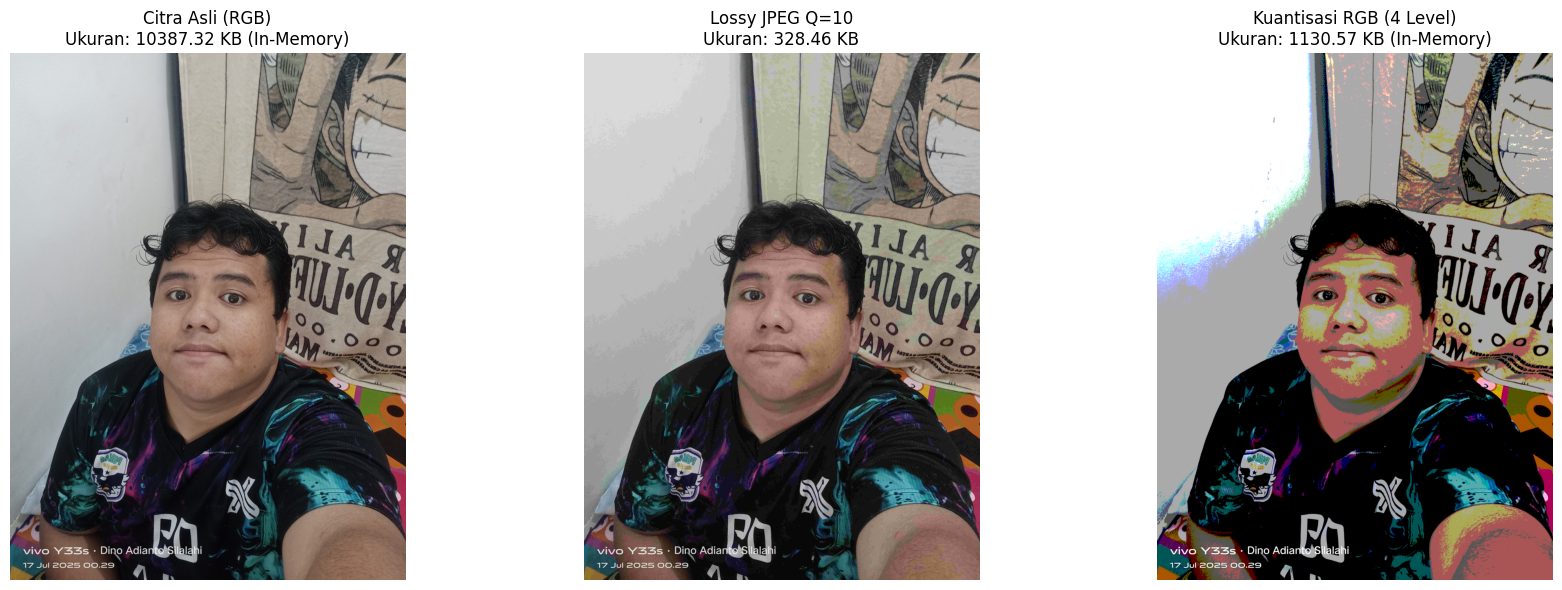

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs = axs.ravel()

axs[0].imshow(dino_rgb)
axs[0].set_title(f'Citra Asli (RGB)\nUkuran: {original_size_kb:.2f} KB (In-Memory)')
axs[0].axis('off')

axs[1].imshow(jpeg_rgb)
axs[1].set_title(f'Lossy JPEG Q=10\nUkuran: {jpeg_size_kb:.2f} KB')
axs[1].axis('off')

axs[2].imshow(quantized_rgb)
axs[2].set_title(f'Kuantisasi RGB (4 Level)\nUkuran: {quantized_size_kb:.2f} KB (In-Memory)')
axs[2].axis('off')

plt.tight_layout()
plt.show()